# Experiments With SOM Networks
## Iris Dataset

Test different combinations of learning rates and sigma value (size of neighborhood).

All tests are going to use the gaussian neighborhood with a random seed of 5 to initialize the weights.

To show the results, the best 2 resulting network will be choosen.

## Imports

In [1]:
from minisom import MiniSom
from sklearn import datasets
import itertools
import numpy as np
import matplotlib.pyplot as plt

## Functions

In [2]:
# Model building

def create_model(size, input_dim, sigma=1.0, learning_rate=1.0, nf="gaussian", random_seed=5):
    return MiniSom(size, size, input_dim, sigma=sigma, learning_rate=learning_rate, 
                   neighborhood_function=nf, random_seed=random_seed)

def create_bundle_of_models(model_parameters):
    return [
        {**{"model": create_model(**model_parameter)}, **model_parameter}
        for model_parameter in model_parameters
    ]

def create_permutations(list_of_data_1, list_of_data_2):
    return list(itertools.product(list_of_data_1, list_of_data_2))

def create_test_parameters(sigma_list, learning_rate_list):
    return [
        {"sigma": parameter[0], "learning_rate": parameter[1]}
        for parameter in create_permutations(sigma_list, learning_rate_list)
    ]

# Data manipulation

# Rescale the data between 0 and 1: Xr = X - X_min/(X_max - X_min)
def normalize_data(data):
    max_value = np.max(data)
    min_value = np.min(data)
    return (data - min_value) / (max_value - min_value)

# Plots

def plot_u_matrix(model):
    plt.figure(figsize=(10, 10))
    plt.pcolor(model['model'].distance_map().T, cmap='coolwarm')
    plt.colorbar()    

    markers = ['o', 'v', 's']
    colors = ['C2', 'C1', 'C3']
    for idx, data in enumerate(input_data):
        winner = model['model'].winner(data)
        plt.plot(winner[0]+.5, winner[1]+.5, markers[target[idx]], markerfacecolor='None',
                 markeredgecolor=colors[target[idx]], markersize=12, markeredgewidth=2)
    plt.axis([0, 30, 0, 30])
    plt.show()
    
def plot_hit_map(model):
    plt.figure(figsize=(10, 10))
    plt.pcolor(model['model'].activation_response(input_data), cmap='Reds')
    plt.colorbar() 

## The Dataset

In [3]:
iris = datasets.load_iris()

# Data already in desired format for the MiniSom library (numpy matrix)
print("Number of samples: %s" % (len(iris["data"])))
print(iris)

Number of samples: 150
{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5

In [4]:
# Splitting the data

# Normalized input
input_data = normalize_data(iris["data"])

# Target classes
target = iris["target"]

## Model parameters and building

In [5]:
sigma_list = [0.01, 0.1, 1.0, 2.0, 5.0, 10.0]
learning_rate_list = [0.01, 0.1, 0.5, 1.0]

# Fixed grid of 30x30
size = 30

# Fixed iteration number for all models
iterations = 5000

# Number of features, in this case, 4
input_dim = input_data.shape[1]

models = create_bundle_of_models(
    [
        {**parameters, **{"size": size, "input_dim": input_dim}}
        for parameters in create_test_parameters(sigma_list, learning_rate_list)
    ]
)

## Train the models and capture topographic and quantization errors (for ranking)

In [6]:
for model in models:
    # Training using random samples each iteration
    model["model"].train_batch(input_data, iterations)
    model["topographic_error"] = model["model"].topographic_error(input_data)
    model["quantization_error"] = model["model"].quantization_error(input_data)

## Ranking the best 2 models

In [7]:
ranked_models = sorted(models, key = lambda x: (x["topographic_error"], x["quantization_error"]))
best_models = ranked_models[:2]
ranked_models

[{'model': <minisom.MiniSom at 0x7f60a1b9f550>,
  'sigma': 1.0,
  'learning_rate': 1.0,
  'size': 30,
  'input_dim': 4,
  'topographic_error': 0.0,
  'quantization_error': 0.0028004552923811955},
 {'model': <minisom.MiniSom at 0x7f60a1b9f5f8>,
  'sigma': 2.0,
  'learning_rate': 0.5,
  'size': 30,
  'input_dim': 4,
  'topographic_error': 0.0,
  'quantization_error': 0.010587654186470377},
 {'model': <minisom.MiniSom at 0x7f60a1b9f748>,
  'sigma': 5.0,
  'learning_rate': 0.5,
  'size': 30,
  'input_dim': 4,
  'topographic_error': 0.0,
  'quantization_error': 0.02797604718205332},
 {'model': <minisom.MiniSom at 0x7f60a1b9f668>,
  'sigma': 2.0,
  'learning_rate': 1.0,
  'size': 30,
  'input_dim': 4,
  'topographic_error': 0.006666666666666667,
  'quantization_error': 0.009226820385050004},
 {'model': <minisom.MiniSom at 0x7f60a1b9f710>,
  'sigma': 5.0,
  'learning_rate': 0.1,
  'size': 30,
  'input_dim': 4,
  'topographic_error': 0.02,
  'quantization_error': 0.03016093003412768},
 {'model

## Data visualization

### U-Matrix

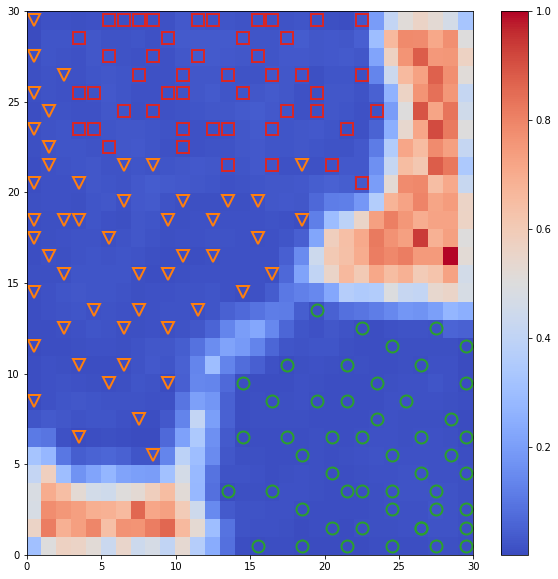

In [8]:
# Rank 1 model

plot_u_matrix(best_models[0])

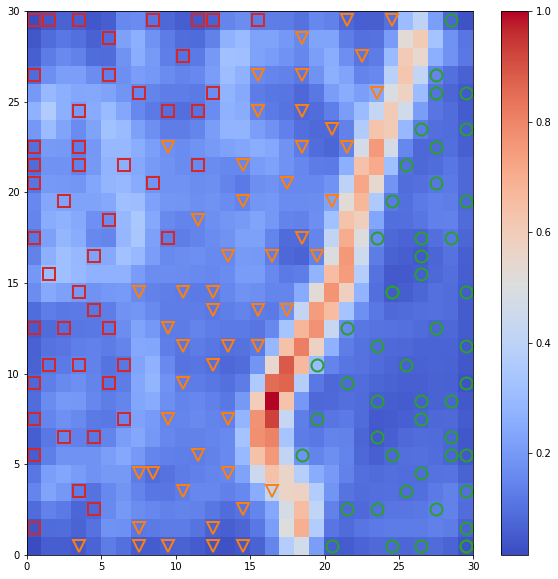

In [9]:
# Rank 2 model
plot_u_matrix(best_models[1])

### Heat Maps

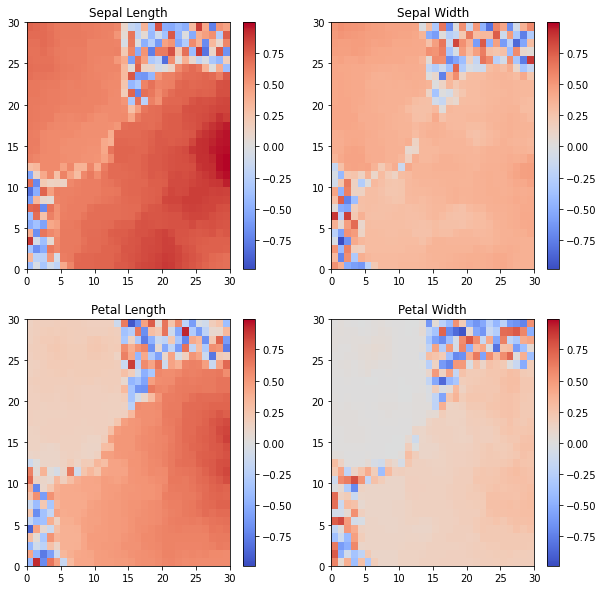

In [10]:
# Rank 1 model

def get_weights(weights, feature_idx):
    feature_weights = []
    for neuron in weights:
        data = []
        for weight in neuron:
            data.append(weight[feature_idx])
        feature_weights.append(list(data))

    return np.array(feature_weights)

def plot_heat_maps(data_1, data_2, data_3, data_4, min_weight, max_weight):
    fig, axs = plt.subplots(2, 2, figsize=(10,10))

    cm = axs[0, 0].pcolor(sepal_length, cmap='coolwarm', vmin=min_weight, vmax=max_weight)
    axs[0, 0].set_title('Sepal Length')
    fig.colorbar(cm, ax=axs[0,0])

    cm = axs[0, 1].pcolor(sepal_width, cmap='coolwarm', vmin=min_weight, vmax=max_weight)
    axs[0, 1].set_title('Sepal Width')
    fig.colorbar(cm, ax=axs[0,1])

    cm = axs[1, 0].pcolor(petal_length, cmap='coolwarm', vmin=min_weight, vmax=max_weight)
    axs[1, 0].set_title('Petal Length')
    fig.colorbar(cm, ax=axs[1,0])

    cm = axs[1, 1].pcolor(petal_width, cmap='coolwarm', vmin=min_weight, vmax=max_weight)
    axs[1, 1].set_title('Petal Width')
    fig.colorbar(cm, ax=axs[1,1])

    for ax in axs.flat:
        ax.label_outer()
    
weights = best_models[0]['model'].get_weights()

sepal_length = get_weights(weights, 0)
sepal_width = get_weights(weights, 1)
petal_length = get_weights(weights, 2)
petal_width = get_weights(weights, 3)

min_weight = np.min(weights)
max_weight = np.max(weights)

plot_heat_maps(sepal_length, sepal_width, petal_length, petal_width, min_weight, max_weight)

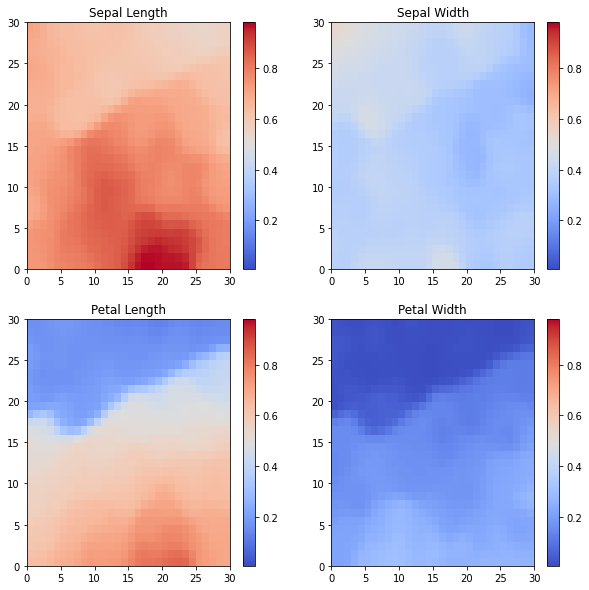

In [11]:
# Rank 2 model

weights = best_models[1]['model'].get_weights()

sepal_length = get_weights(weights, 0)
sepal_width = get_weights(weights, 1)
petal_length = get_weights(weights, 2)
petal_width = get_weights(weights, 3)

min_weight = np.min(weights)
max_weight = np.max(weights)

plot_heat_maps(sepal_length, sepal_width, petal_length, petal_width, min_weight, max_weight)

### Hit Maps

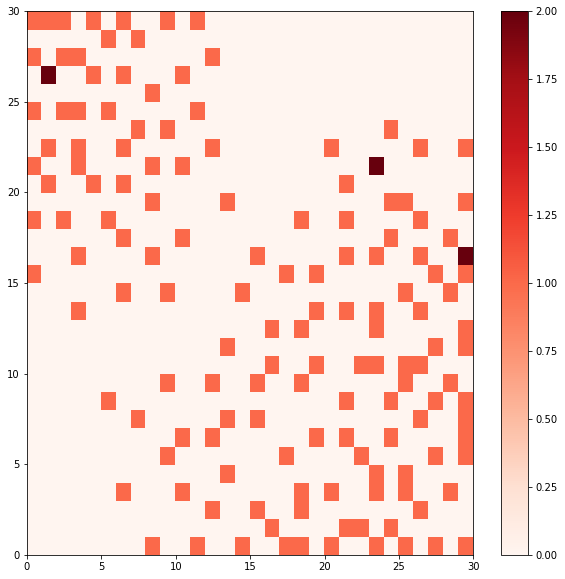

In [12]:
#Rank 1 model
plot_hit_map(best_models[0])

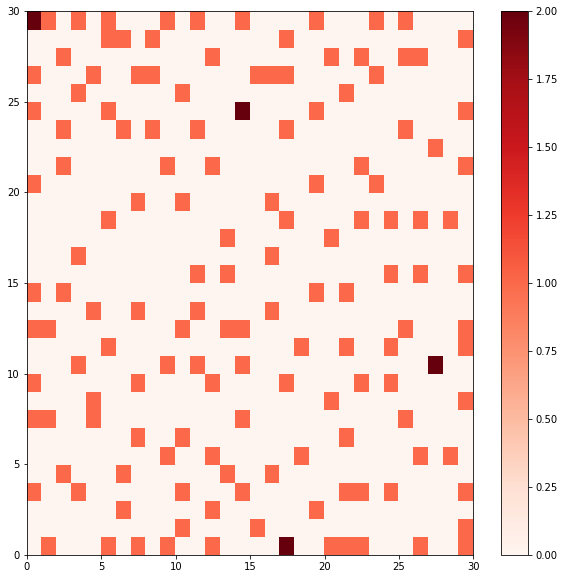

In [13]:
#Rank 2 model
plot_hit_map(best_models[1])

## Conclusions and Discussions

The best model (in terms of topographic and quantization errors) uses the learning rate of 1.0 and sigma of 2.0 and the second best uses sigma 5.0 and learning rate 1.0. Looking at the remaining models, is noticeable that a moderate sigma with a learning rate of 1.0 is the best choice for training this type of network for this dataset.

Looking at the u-matrix, colors close to red indicates neurons that have a large distance from the other nodes, and colors close to blue indicates neurons that are closer to each other. The best model separates really well the two big groups of classes, but no so good so separate the other two closer classes. The second model separates the two groups too, but not so good as the best model.

Looking at the hitmaps, the best model has a clearer separation of more frequent winner neurons than the second, dividing itself in two distinct areas.